<a href="https://colab.research.google.com/github/atlas-github/Sandbox/blob/master/Text_Mining_with_R_Chapter_2_Sentiment_analysis_with_tidy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: [Text Mining with R Chapter 2 Sentiment analysis with tidy data](https://www.tidytextmining.com/sentiment.html)

In [23]:
install.packages("textdata")
library(tidytext)
library(textdata)

my_lexicon = lexicon_afinn()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Do you want to download:
 Name: AFINN-111 
 URL: http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010 
 License: Open Database License (ODbL) v1.0 
 Size: 78 KB (cleaned 59 KB) 
 Download mechanism: https 


ERROR: ignored

In [24]:
get_sentiments("bing")

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [25]:
get_sentiments("nrc")

Do you want to download:
 Name: NRC Word-Emotion Association Lexicon 
 URL: http://saifmohammad.com/WebPages/lexicons.html 
 License: License required for commercial use. Please contact Saif M. Mohammad (saif.mohammad@nrc-cnrc.gc.ca). 
 Size: 22.8 MB (cleaned 424 KB) 
 Download mechanism: http 
 Citation info:

This dataset was published in Saif M. Mohammad and Peter Turney. (2013), ``Crowdsourcing a Word-Emotion Association Lexicon.'' Computational Intelligence, 29(3): 436-465.

article{mohammad13,
author = {Mohammad, Saif M. and Turney, Peter D.},
title = {Crowdsourcing a Word-Emotion Association Lexicon},
journal = {Computational Intelligence},
volume = {29},
number = {3},
pages = {436-465},
doi = {10.1111/j.1467-8640.2012.00460.x},
url = {https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-8640.2012.00460.x},
eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1467-8640.2012.00460.x},
year = {2013}
}
If you use this lexicon, then please cite it. 


ERROR: ignored

In [26]:
library(janeaustenr)
library(dplyr)
library(stringr)

tidy_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", 
                                                 ignore_case = TRUE)))) %>%
  ungroup() %>%
  unnest_tokens(word, text)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [27]:
nrc_joy <- get_sentiments("nrc") %>% 
  filter(sentiment == "joy")

tidy_books %>%
  filter(book == "Emma") %>%
  inner_join(nrc_joy) %>%
  count(word, sort = TRUE)

Do you want to download:
 Name: NRC Word-Emotion Association Lexicon 
 URL: http://saifmohammad.com/WebPages/lexicons.html 
 License: License required for commercial use. Please contact Saif M. Mohammad (saif.mohammad@nrc-cnrc.gc.ca). 
 Size: 22.8 MB (cleaned 424 KB) 
 Download mechanism: http 
 Citation info:

This dataset was published in Saif M. Mohammad and Peter Turney. (2013), ``Crowdsourcing a Word-Emotion Association Lexicon.'' Computational Intelligence, 29(3): 436-465.

article{mohammad13,
author = {Mohammad, Saif M. and Turney, Peter D.},
title = {Crowdsourcing a Word-Emotion Association Lexicon},
journal = {Computational Intelligence},
volume = {29},
number = {3},
pages = {436-465},
doi = {10.1111/j.1467-8640.2012.00460.x},
url = {https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-8640.2012.00460.x},
eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1467-8640.2012.00460.x},
year = {2013}
}
If you use this lexicon, then please cite it. 


ERROR: ignored

In [28]:
library(tidyr)

jane_austen_sentiment <- tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(book, index = linenumber %/% 80, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Joining, by = "word"


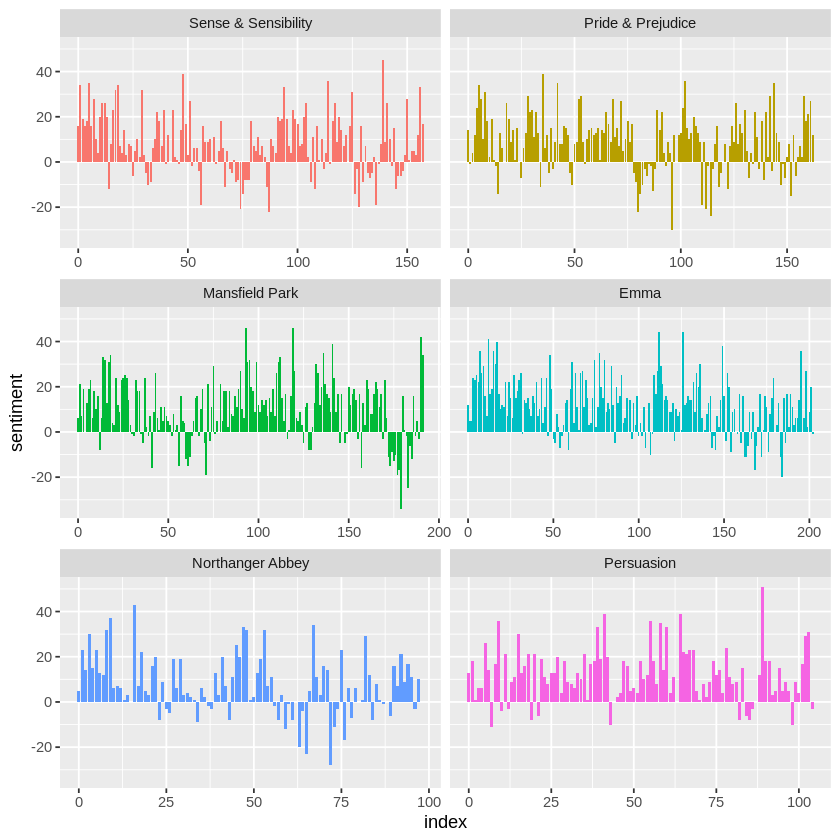

In [29]:
library(ggplot2)

ggplot(jane_austen_sentiment, aes(index, sentiment, fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = "free_x")

In [30]:
pride_prejudice <- tidy_books %>% 
  filter(book == "Pride & Prejudice")

pride_prejudice

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Pride & Prejudice,1,0,pride
Pride & Prejudice,1,0,and
Pride & Prejudice,1,0,prejudice
Pride & Prejudice,3,0,by
Pride & Prejudice,3,0,jane
Pride & Prejudice,3,0,austen
Pride & Prejudice,7,1,chapter
Pride & Prejudice,7,1,1
Pride & Prejudice,10,1,it


In [31]:
afinn <- pride_prejudice %>% 
  inner_join(get_sentiments("afinn")) %>% 
  group_by(index = linenumber %/% 80) %>% 
  summarise(sentiment = sum(value)) %>% 
  mutate(method = "AFINN")

bing_and_nrc <- bind_rows(pride_prejudice %>% 
                            inner_join(get_sentiments("bing")) %>%
                            mutate(method = "Bing et al."),
                          pride_prejudice %>% 
                            inner_join(get_sentiments("nrc") %>% 
                                         filter(sentiment %in% c("positive", 
                                                                 "negative"))) %>%
                            mutate(method = "NRC")) %>%
  count(method, index = linenumber %/% 80, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Do you want to download:
 Name: AFINN-111 
 URL: http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010 
 License: Open Database License (ODbL) v1.0 
 Size: 78 KB (cleaned 59 KB) 
 Download mechanism: https 


ERROR: ignored

In [32]:
bind_rows(afinn, 
          bing_and_nrc) %>%
  ggplot(aes(index, sentiment, fill = method)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~method, ncol = 1, scales = "free_y")

ERROR: ignored

In [33]:
get_sentiments("nrc") %>% 
     filter(sentiment %in% c("positive", 
                             "negative")) %>% 
  count(sentiment)

get_sentiments("bing") %>% 
  count(sentiment)

Do you want to download:
 Name: NRC Word-Emotion Association Lexicon 
 URL: http://saifmohammad.com/WebPages/lexicons.html 
 License: License required for commercial use. Please contact Saif M. Mohammad (saif.mohammad@nrc-cnrc.gc.ca). 
 Size: 22.8 MB (cleaned 424 KB) 
 Download mechanism: http 
 Citation info:

This dataset was published in Saif M. Mohammad and Peter Turney. (2013), ``Crowdsourcing a Word-Emotion Association Lexicon.'' Computational Intelligence, 29(3): 436-465.

article{mohammad13,
author = {Mohammad, Saif M. and Turney, Peter D.},
title = {Crowdsourcing a Word-Emotion Association Lexicon},
journal = {Computational Intelligence},
volume = {29},
number = {3},
pages = {436-465},
doi = {10.1111/j.1467-8640.2012.00460.x},
url = {https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-8640.2012.00460.x},
eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1467-8640.2012.00460.x},
year = {2013}
}
If you use this lexicon, then please cite it. 


ERROR: ignored

In [34]:
bing_word_counts <- tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

bing_word_counts

Joining, by = "word"


word,sentiment,n
<chr>,<chr>,<int>
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639
enough,positive,613
happy,positive,534
love,positive,495


Selecting by n


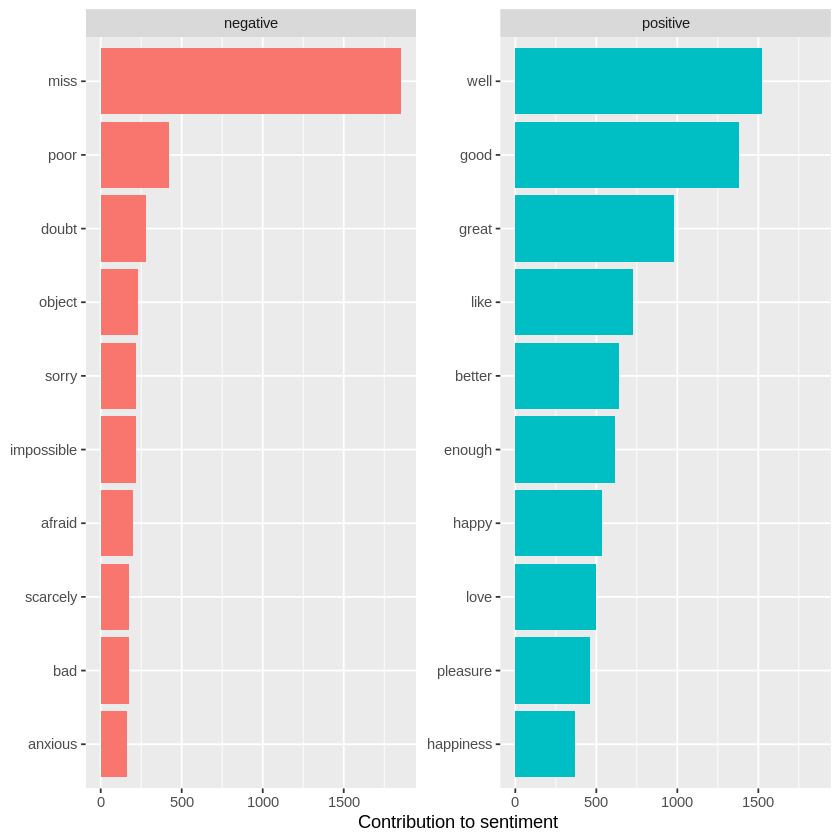

In [35]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

In [36]:
custom_stop_words <- bind_rows(tibble(word = c("miss"), 
                                          lexicon = c("custom")), 
                               stop_words)

custom_stop_words

word,lexicon
<chr>,<chr>
miss,custom
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Loading required package: RColorBrewer
Joining, by = "word"


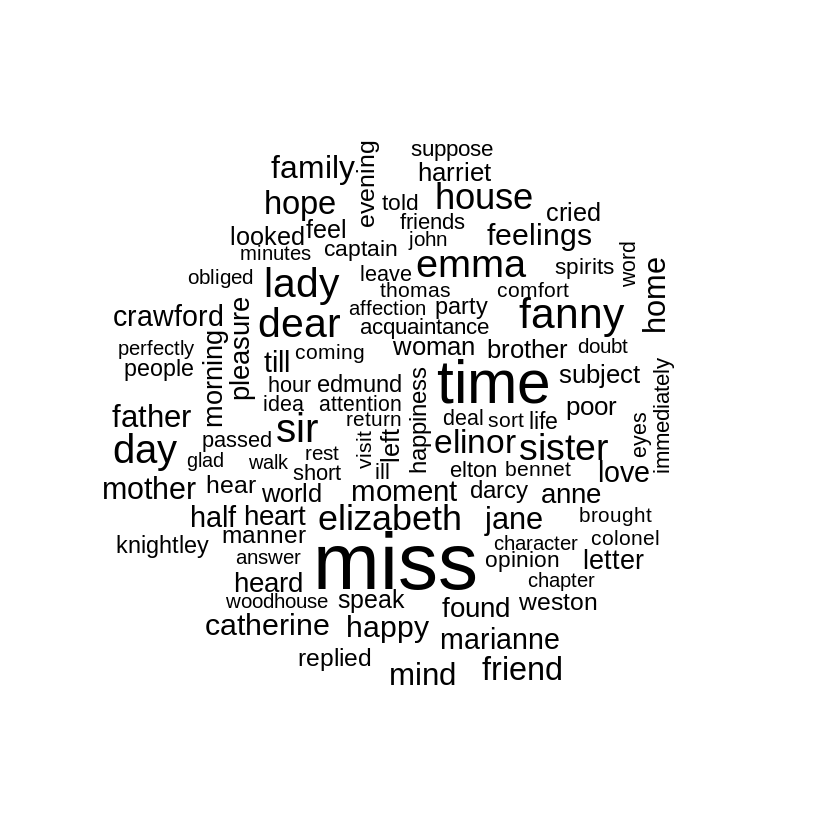

In [39]:
install.packages("wordcloud")
library(wordcloud)

tidy_books %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Joining, by = "word"


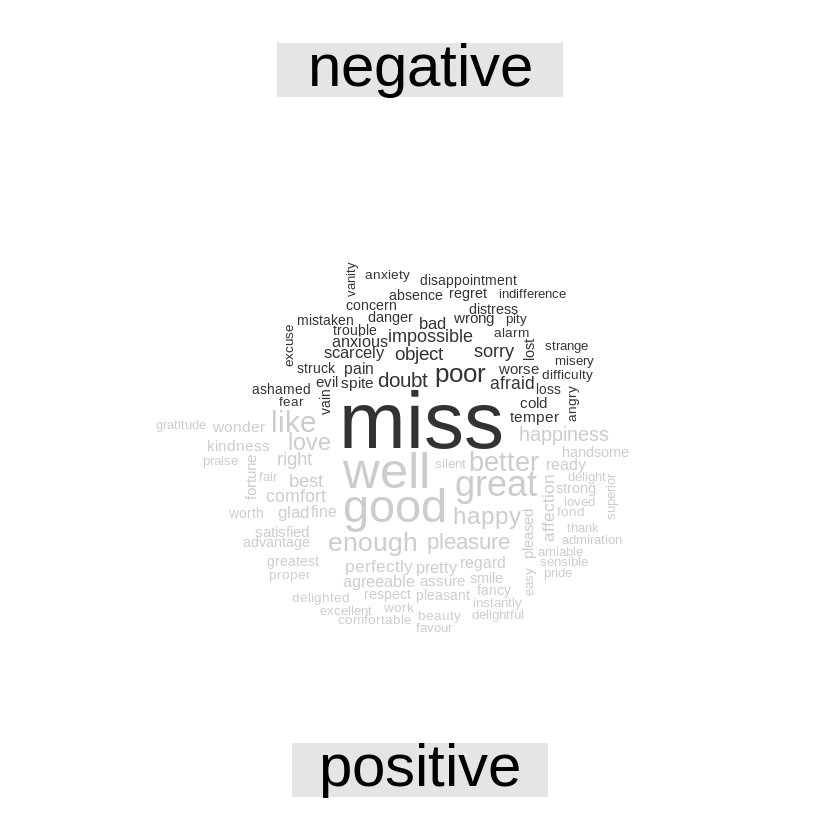

In [40]:
library(reshape2)

tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("gray20", "gray80"),
                   max.words = 100)

In [0]:
PandP_sentences <- tibble(text = prideprejudice) %>% 
  unnest_tokens(sentence, text, token = "sentences")

In [42]:
PandP_sentences$sentence[2]

[1] "however little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters."

In [43]:
austen_chapters <- austen_books() %>%
  group_by(book) %>%
  unnest_tokens(chapter, text, token = "regex", 
                pattern = "Chapter|CHAPTER [\\dIVXLC]") %>%
  ungroup()

austen_chapters %>% 
  group_by(book) %>% 
  summarise(chapters = n())

book,chapters
<fct>,<int>
Sense & Sensibility,51
Pride & Prejudice,62
Mansfield Park,49
Emma,56
Northanger Abbey,32
Persuasion,25


In [44]:
bingnegative <- get_sentiments("bing") %>% 
  filter(sentiment == "negative")

wordcounts <- tidy_books %>%
  group_by(book, chapter) %>%
  summarize(words = n())

tidy_books %>%
  semi_join(bingnegative) %>%
  group_by(book, chapter) %>%
  summarize(negativewords = n()) %>%
  left_join(wordcounts, by = c("book", "chapter")) %>%
  mutate(ratio = negativewords/words) %>%
  filter(chapter != 0) %>%
  top_n(1) %>%
  ungroup()

Joining, by = "word"
Selecting by ratio


book,chapter,negativewords,words,ratio
<fct>,<int>,<int>,<int>,<dbl>
Sense & Sensibility,43,161,3405,0.04728341
Pride & Prejudice,34,111,2104,0.05275665
Mansfield Park,46,173,3685,0.04694708
Emma,15,151,3340,0.04520958
Northanger Abbey,21,149,2982,0.04996647
Persuasion,4,62,1807,0.03431101
